In [3]:
import pandas as pd

In [6]:
data_frame = pd.read_csv(r'/Users/pasindumalinda/Documents/python project/machine learning work shop/CO2_level_prediction/air_quality_hourly_data_Colombo_METDept.csv')

Explore Dataset


In [7]:
data_frame.head()

,Unnamed: 0,Time,CO2
0,0,2022-12-21 00:00:00,562
1,1,2022-12-21 01:00:00,511
2,2,2022-12-21 02:00:00,511
3,3,2022-12-21 03:00:00,507
4,4,2022-12-21 04:00:00,498


In [12]:
data_frame.tail()

,Unnamed: 0,Time,CO2
5938,5938,2024-03-21 09:00:00,MF
5939,5939,2024-03-21 10:00:00,MF
5940,5940,2024-03-21 11:00:00,MF
5941,5941,2024-03-21 12:00:00,MF
5942,5942,2024-03-21 13:00:00,MF


In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5943 entries, 0 to 5942
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5943 non-null   int64 
 1   Time        5943 non-null   object
 2   CO2         5731 non-null   object
dtypes: int64(1), object(2)
memory usage: 139.4+ KB


In [14]:
data_frame.describe()

,Unnamed: 0
count,5943.000000
mean,2971.000000
std,1715.740656
min,0.000000
25%,1485.500000
50%,2971.000000
75%,4456.500000
max,5942.000000


In [15]:
data_frame.shape

(5943, 3)

In [16]:
unique_values = data_frame.nunique()
print(unique_values)

Unnamed: 0    5943
Time          5943
CO2            238
dtype: int64


In [17]:
data_frame02 = data_frame.drop(['Unnamed: 0'], axis = 'columns')
data_frame02.head()

,Time,CO2
0,2022-12-21 00:00:00,562
1,2022-12-21 01:00:00,511
2,2022-12-21 02:00:00,511
3,2022-12-21 03:00:00,507
4,2022-12-21 04:00:00,498


Clean our dataset

In [18]:
data_frame02.isnull().sum()

Time      0
CO2     212
dtype: int64

In [19]:
data_frame03 = data_frame02.dropna()

print(data_frame03.isnull().sum())

Time    0
CO2     0
dtype: int64


In [20]:
data_frame03['CO2'] = pd.to_numeric(data_frame03['CO2'], errors = 'coerce')

C:\Users\MyPlus\AppData\Local\Temp\ipykernel_15968\1166930840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame03['CO2'] = pd.to_numeric(data_frame03['CO2'], errors = 'coerce')


In [21]:
data_frame03['Time'] = pd.to_datetime(data_frame03['Time'], format = 'mixed', errors = 'coerce')

C:\Users\MyPlus\AppData\Local\Temp\ipykernel_15968\3860380396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame03['Time'] = pd.to_datetime(data_frame03['Time'], format = 'mixed', errors = 'coerce')


In [22]:
print(data_frame03.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5731 entries, 0 to 5942
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    5731 non-null   datetime64[ns]
 1   CO2     3083 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 134.3 KB
None


In [23]:
print(data_frame03.isnull().sum())

Time       0
CO2     2648
dtype: int64


In [24]:
data_frame04 = data_frame03.dropna()

print(data_frame04.isnull().sum())

Time    0
CO2     0
dtype: int64


In [25]:
data_frame04.shape

(3083, 2)

Data Visualization 

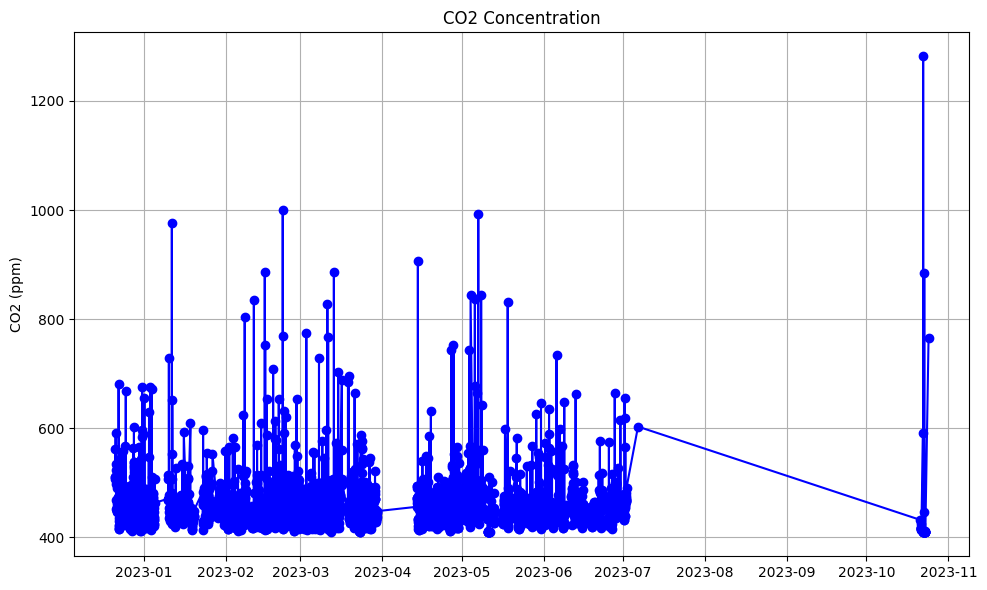

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.plot(data_frame04['Time'], data_frame04['CO2'], color='blue', marker='o')
axs.set_title('CO2 Concentration')
axs.set_ylabel('CO2 (ppm)')
axs.grid(True)

plt.tight_layout()
plt.show()

In [27]:
data_frame04['TimeDelta'] = data_frame04['Time'].diff()

data_frame04

C:\Users\MyPlus\AppData\Local\Temp\ipykernel_15968\683225876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame04['TimeDelta'] = data_frame04['Time'].diff()


,Time,CO2,TimeDelta
0,2022-12-21 00:00:00,562.0,NaT
1,2022-12-21 01:00:00,511.0,0 days 01:00:00
2,2022-12-21 02:00:00,511.0,0 days 01:00:00
3,2022-12-21 03:00:00,507.0,0 days 01:00:00
4,2022-12-21 04:00:00,498.0,0 days 01:00:00
...,...,...,...
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00
3294,2023-10-23 07:00:00,410.0,0 days 01:00:00


In [28]:
continuous_rows = data_frame04.copy()

In [29]:
continuous_rows = continuous_rows[continuous_rows['TimeDelta'] == pd.Timedelta(hours= 1)]

In [30]:
continuous_rows['index_diff'] = continuous_rows.index.diff()

continuous_rows

,Time,CO2,TimeDelta,index_diff
1,2022-12-21 01:00:00,511.0,0 days 01:00:00,NaN
2,2022-12-21 02:00:00,511.0,0 days 01:00:00,1.0
3,2022-12-21 03:00:00,507.0,0 days 01:00:00,1.0
4,2022-12-21 04:00:00,498.0,0 days 01:00:00,1.0
5,2022-12-21 05:00:00,591.0,0 days 01:00:00,1.0
...,...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00,1.0
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00,1.0
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00,1.0
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00,1.0


In [31]:
continuous_rows['group'] = (continuous_rows['index_diff'] != 1).cumsum()

continuous_rows

,Time,CO2,TimeDelta,index_diff,group
1,2022-12-21 01:00:00,511.0,0 days 01:00:00,NaN,1
2,2022-12-21 02:00:00,511.0,0 days 01:00:00,1.0,1
3,2022-12-21 03:00:00,507.0,0 days 01:00:00,1.0,1
4,2022-12-21 04:00:00,498.0,0 days 01:00:00,1.0,1
5,2022-12-21 05:00:00,591.0,0 days 01:00:00,1.0,1
...,...,...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00,1.0,123
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00,1.0,123
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00,1.0,123
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00,1.0,123


In [32]:
largest_group = continuous_rows['group'].value_counts().idxmax()

largest_group

4

In [33]:
largest_continuous_data = continuous_rows[continuous_rows['group'] == largest_group]

largest_continuous_data

,Time,CO2,TimeDelta,index_diff,group
53,2022-12-23 06:00:00,457.0,0 days 01:00:00,3.0,4
54,2022-12-23 07:00:00,463.0,0 days 01:00:00,1.0,4
55,2022-12-23 08:00:00,469.0,0 days 01:00:00,1.0,4
56,2022-12-23 09:00:00,545.0,0 days 01:00:00,1.0,4
57,2022-12-23 10:00:00,442.0,0 days 01:00:00,1.0,4
...,...,...,...,...,...
273,2023-01-01 10:00:00,466.0,0 days 01:00:00,1.0,4
274,2023-01-01 11:00:00,447.0,0 days 01:00:00,1.0,4
275,2023-01-01 12:00:00,431.0,0 days 01:00:00,1.0,4
276,2023-01-01 13:00:00,418.0,0 days 01:00:00,1.0,4


In [34]:
largest_continuous_data = largest_continuous_data.drop(['index_diff', 'group'], axis = 1)

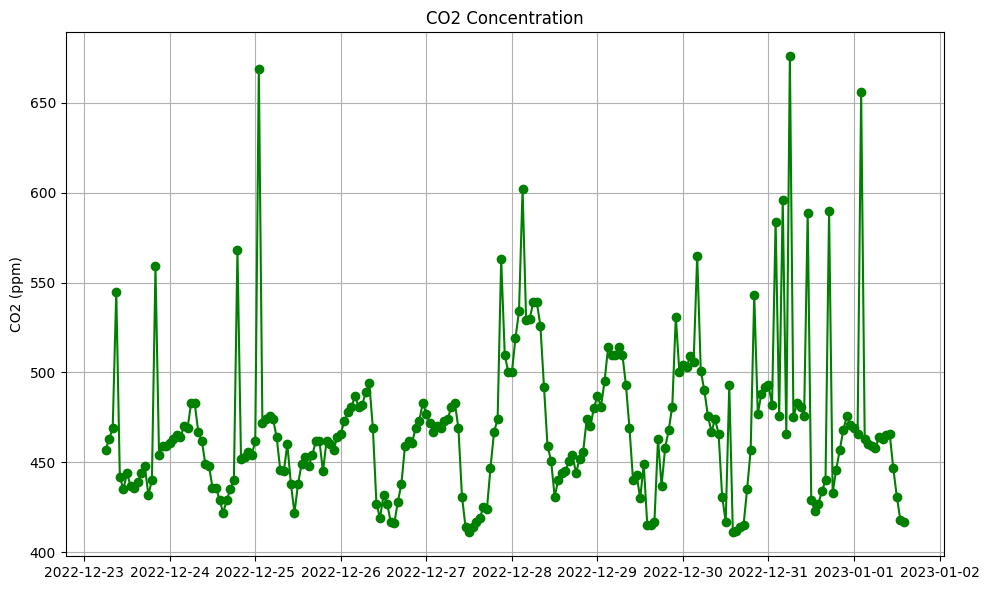

In [35]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.plot(largest_continuous_data['Time'], largest_continuous_data['CO2'], color='green', marker='o')
axs.set_title('CO2 Concentration')
axs.set_ylabel('CO2 (ppm)')
axs.grid(True)


plt.tight_layout()
plt.show()

In [36]:
largest_continuous_data.shape

(225, 3)

In [37]:
(len(largest_continuous_data)/len(data_frame)) * 100

3.7859666834931853

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


df = largest_continuous_data.copy()

df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour

X = df[['year', 'month', 'day', 'hour']]
y = df['CO2']



split_point = int(len(df) * 0.8)

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}


results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    tscv = TimeSeriesSplit(n_splits=5)
    scores = cross_val_score(pipeline, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'Cross-val MSE': -np.mean(scores),
        'Test MSE': mse,
        'Test R2': r2
    }


for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


best_model = min(results, key=lambda x: results[x]['Test MSE'])
print(f"\nBest model based on Test MSE: {best_model}")

best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', models[best_model])
])
best_pipeline.fit(X_train, y_train)


sample_date = pd.to_datetime('2023-08-25 14:00:00')
sample_input = pd.DataFrame({
    'year': [sample_date.year],
    'month': [sample_date.month],
    'day': [sample_date.day],
    'hour': [sample_date.hour]
})

prediction = best_pipeline.predict(sample_input)
print(f"\nPredicted CO2 level for {sample_date}: {prediction[0]:.2f}")


Linear Regression:
  Cross-val MSE: 1448.9454
  Test MSE: 3782.5027
  Test R2: -0.0951

Random Forest:
  Cross-val MSE: 1273.0261
  Test MSE: 3280.2529
  Test R2: 0.0503

XGBoost:
  Cross-val MSE: 1589.1661
  Test MSE: 3758.9011
  Test R2: -0.0882

Best model based on Test MSE: Random Forest

Predicted CO2 level for 2023-08-25 14:00:00: 449.48


In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt
from warnings import catch_warnings, filterwarnings
filterwarnings("ignore")


def predict_co2_levels(df, forecast_horizon=10):
    """
    Predict CO2 levels using ARIMA model.

    Parameters:
    df (pandas.DataFrame): DataFrame with 'Time' and 'CO2' columns
    forecast_horizon (int): Number of future time points to predict

    Returns:
    tuple: (predictions, mse, rmse)
    """

    df = df.sort_values('Time')


    df.set_index('Time', inplace=True)


    # You may need to adjust the order (p,d,q) based on your specific data
    model = ARIMA(df['CO2'], order=(1,1,1))
    results = model.fit()

    # Make predictions
    predictions = results.forecast(steps=forecast_horizon)

    # Calculate Mean Squared Error and Root Mean Squared Error
    mse = mean_squared_error(df['CO2'][-forecast_horizon:], predictions)

    return predictions, mse

# Example usage:
# Assuming 'df' is your DataFrame with 'Time' and 'CO2' columns
predictions, mse, = predict_co2_levels(largest_continuous_data)
# print(f"Predictions: {predictions}")
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 893.2996228526233


Importing plotly failed. Interactive plots will not work.
12:16:06 - cmdstanpy - INFO - Chain [1] start processing
12:16:07 - cmdstanpy - INFO - Chain [1] done processing


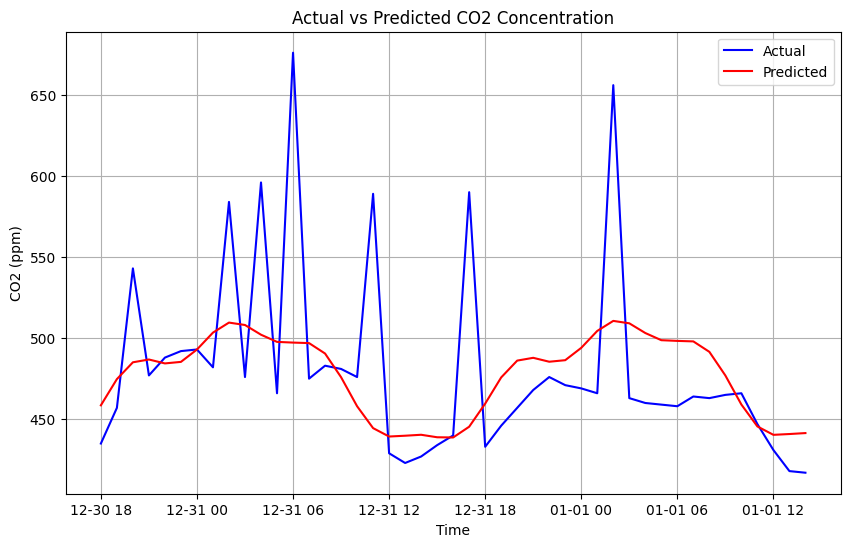

Root Mean Squared Error (RMSE): 54.45023788502452


In [47]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with the data, and it contains the 'Time' and 'CO2' columns

# Prepare the data for the Prophet model
df_prophet = largest_continuous_data[['Time', 'CO2']].rename(columns={'Time': 'ds', 'CO2': 'y'})

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
train_data = df_prophet[:train_size]
test_data = df_prophet[train_size:]

# Create and fit the Prophet model with the training data
model = Prophet()
model.fit(train_data)

# Make predictions on the test data
forecast = model.predict(test_data[['ds']])

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], test_data['y'], label='Actual', color='blue')
plt.plot(test_data['ds'], forecast['yhat'], label='Predicted', color='red')
plt.title('Actual vs Predicted CO2 Concentration')
plt.xlabel('Time')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
mse = mean_squared_error(test_data['y'], forecast['yhat'])
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)